# EPR experiment
Ted Corcovilos (c) 2022

Calculation of the CSHS version of the EPR experiment disproving Einstein's _hidden local variables_ hypothesis.

## Background

The setup is that we have two Stern-Gerlach type detectors, belonging to Alice and Bob.  The angles of the detectors can be changed by each person, e.g. Alice can have her detector in position A or A', similarly with Bob.

Both measure one of an entangled particle pair, and afterwards share their data to calculate the correlations
$$
\rho(A,B) = \frac{1}{N} \sum_{j=1}^N m_A m_B = \frac{1}{(\hbar/2)^2} \left< \hat{S}_A\hat{S}_B\right>,
$$
where $\hat{S}_A$ is the spin measurement operator for Alice's particle with the detector in orientation A, and similarly $\hat{S}_B$ is the spin measurement operator for Bob's particle with the detector in orientation B.

The CSHS form of Bell's inequality test for hidden variables states that for a real, local theory of quantum mechanics, the following must be true:
$$
\rho(A',B')+\rho(A',B)+\rho(A,B')-\rho(A,B) \le 2,
$$
for all possible orientations of A, A', B, and B'.

If the above expression is _false_, then quantum mechanics is not a real and local theory.

The maximum violation is predicted for the following sets of angles: A = 0°, A' = 90°, B = -135°, and B' = -45°.

## Outline of calculation
We need three pieces to evalute the CSHS inequality:
* An expression for the correlation functions as quantum operators (we'll use matrix notation).
* An expression for each of the two candidate initial states:
  * A pair of entangled particles in the Bell singlet state: $\lvert \psi \rangle = \frac{1}{\sqrt{2}} \bigl( \lvert + - \rangle - \lvert - + \rangle \bigr).$
  * A pair of classically anticorrelated particles (we'll define this below).

## Matrix notation
We'll use matrix notation for our calculation because that is easier to implement in code.  For single particles we'll use the $\hat{S}_z$ basis:
$$
\lvert + \rangle \doteq \binom{1}{0}, \qquad \lvert - \rangle \doteq \binom{0}{1}.
$$

We'll build our two-particle operators and states using the [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product) to enact the tensor product between the two particles.

## Correlation functions
From above, we have the definition for the correlators: 
$$
\rho(A,B) = \frac{1}{(\hbar/2)^2} \left< \hat{S}_A\hat{S}_B\right>.
$$
We need four copies of this, one for each of the angle combinations listed above.

In [17]:
# import our python libraries for algebra
from sympy import *
from sympy.physics import *
from sympy.physics.quantum import *

In [2]:
# tell sympy to print nicely
init_printing()

In [67]:
# spin operator in the xz plane at angle θ
# dropping factors of hbar/2
θ, φ = symbols("θ, φ", real=True)
S_n = lambda θ: cos(θ)*msigma(3) + sin(θ)*msigma(1)

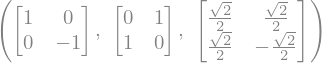

In [11]:
# try out a few to see that it works
S_n(0), S_n(pi/2), S_n(pi/4)

In [58]:
#Build the correlators
# first define the angles
θ_A = 0; θ_Ap = pi/2; θ_B = -pi/4; θ_Bp = -3*pi/4

In [59]:
ρ_AB = TensorProduct(S_n(θ_A),S_n(θ_B))
ρ_ApB = TensorProduct(S_n(θ_Ap),S_n(θ_B))
ρ_ABp = TensorProduct(S_n(θ_A),S_n(θ_Bp))
ρ_ApBp = TensorProduct(S_n(θ_Ap),S_n(θ_Bp))

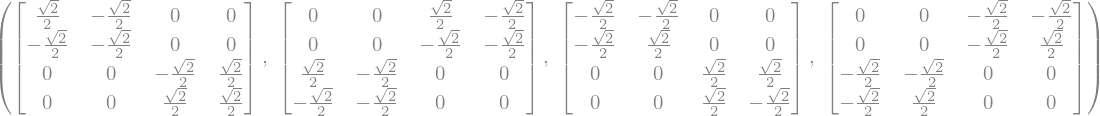

In [60]:
# printing these out
ρ_AB, ρ_ApB, ρ_ABp, ρ_ApBp

We might as well combine these into the LHS of the CHSH inequality
This will be the operator we evaluate for our two candidate initial states.


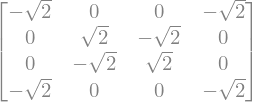

In [61]:
CSHS = -ρ_AB + ρ_ApB + ρ_ABp + ρ_ApBp
CSHS

## Bell singlet state
This one is easy because we just need the state vector for
$$\lvert \psi \rangle = \frac{1}{\sqrt{2}} \bigl( \lvert + - \rangle - \lvert - + \rangle \bigr).$$

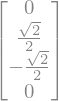

In [62]:
Ψ_Bell = Matrix([[0],[1],[-1],[0]])/sqrt(2)
Ψ_Bell

We evaluate the expectation values in the usual way for state vectors:
$$
\langle \rho_{AB} \rangle_{\psi_{Bell}} = \langle \psi_{Bell} \vert \rho_{AB} \vert \psi_{Bell} \rangle \doteq \vec{\psi}_{Bell}^\dagger\,\rho_{AB}\,\vec{\psi}
$$

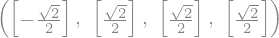

In [63]:
# Calculate the expectation value of the correlation operators
# .H performs the Hermitian conjugate (dagger)
Ψ_Bell.H*ρ_AB*Ψ_Bell, Ψ_Bell.H*ρ_ApB*Ψ_Bell, Ψ_Bell.H*ρ_ABp*Ψ_Bell, Ψ_Bell.H*ρ_ApBp*Ψ_Bell

In [64]:
# adding those up with the correct signs...
Ψ_Bell.H*CSHS*Ψ_Bell

Our expectation value for the LHS of the CHSH inequality for the Bell singlet state is $2\sqrt{2} > 2$, so the Bell singlet violates the local hidden variable hypothesis.

## Classically anti-correlated mixture

This one is a bit trickier to set up.  We need a mixture of all of the possible states with classically anti-correlated particles.  "Mixture" means we have to use a _density operator_ for our math representation.

Recall that for a pure state $\lvert \psi \rangle$, we can define a state density operator
$$
\hat{\rho} = \lvert \psi \rangle \langle \psi \rvert.
$$
In matrix notation, this outer product of ket-bra is represented by a matrix.

For a mixture of states, the density operator is a weighted average of the constituent states:
$$
\hat{\rho} = \sum_j p_j \lvert \psi_j \rangle \langle \psi_j \rvert.
$$

So, what states are we averaging over in our hidden variables hypothesis?  These are anti-correlated spins with the spin axis as the "hidden variable".  We'll represent this axis in spherical coordinates by the angles _θ_ and _ϕ_ as usual.

If particle A is in state
$$
\lvert +_{\theta,\phi} \rangle = \cos\tfrac{\theta}{2}\,\lvert + \rangle + \sin\tfrac{\theta}{2}e^{i\phi}\,\lvert - \rangle,
$$
then particle B will be in the orthogonal state
$$
\lvert -_{\theta,\phi} \rangle = \sin\tfrac{\theta}{2}\,\lvert + \rangle - \cos\tfrac{\theta}{2}e^{i\phi}\,\lvert - \rangle.
$$


In [69]:
# the states as vectors
plus = Matrix([[cos(θ/2)],[sin(θ/2)*exp(I*φ)]])
minus = Matrix([[sin(θ/2)],[-cos(θ/2)*exp(I*φ)]])
plus,minus

⎛⎡     ⎛θ⎞   ⎤  ⎡      ⎛θ⎞   ⎤⎞
⎜⎢  cos⎜─⎟   ⎥  ⎢   sin⎜─⎟   ⎥⎟
⎜⎢     ⎝2⎠   ⎥  ⎢      ⎝2⎠   ⎥⎟
⎜⎢           ⎥, ⎢            ⎥⎟
⎜⎢ ⅈ⋅φ    ⎛θ⎞⎥  ⎢  ⅈ⋅φ    ⎛θ⎞⎥⎟
⎜⎢ℯ   ⋅sin⎜─⎟⎥  ⎢-ℯ   ⋅cos⎜─⎟⎥⎟
⎝⎣        ⎝2⎠⎦  ⎣         ⎝2⎠⎦⎠

The joint state of the two particles will look like
$$
\lvert \psi_{\theta,\phi}\rangle = \lvert +_{\theta,\phi} \rangle\lvert -_{\theta,\phi}\rangle,
$$
where $\theta \in [0,\pi)$ and $\phi \in [0,2\pi)$.  In matrix notation with will be a 4-element vector.

(I'm using the label "hv" for "hidden variables".)

In [72]:
# the joint state as a vector
psi_hv = TensorProduct(plus,minus)
psi_hv

⎡       ⎛θ⎞    ⎛θ⎞    ⎤
⎢    sin⎜─⎟⋅cos⎜─⎟    ⎥
⎢       ⎝2⎠    ⎝2⎠    ⎥
⎢                     ⎥
⎢      ⅈ⋅φ    2⎛θ⎞    ⎥
⎢    -ℯ   ⋅cos ⎜─⎟    ⎥
⎢              ⎝2⎠    ⎥
⎢                     ⎥
⎢     ⅈ⋅φ    2⎛θ⎞     ⎥
⎢    ℯ   ⋅sin ⎜─⎟     ⎥
⎢             ⎝2⎠     ⎥
⎢                     ⎥
⎢  2⋅ⅈ⋅φ    ⎛θ⎞    ⎛θ⎞⎥
⎢-ℯ     ⋅sin⎜─⎟⋅cos⎜─⎟⎥
⎣           ⎝2⎠    ⎝2⎠⎦

Now we need to build up our density operator for the mixture.  The density operator for one specific value of _θ_ and _ϕ_ will be
$$
\hat{\rho}_{\theta,\phi} =
\lvert \psi_{\theta,\phi} \rangle \langle \psi_{\theta,\phi} \rvert = \vec{\psi}_{\theta,\phi} \vec{\psi}_{\theta,\phi}^\dagger.
$$

In [78]:
# density operator for one specific choice of angles
rho_1hv = psi_hv * (psi_hv.H)
rho_1hv

⎡       2⎛θ⎞    2⎛θ⎞        -ⅈ⋅φ    ⎛θ⎞    3⎛θ⎞   -ⅈ⋅φ    3⎛θ⎞    ⎛θ⎞    -2⋅ⅈ⋅
⎢    sin ⎜─⎟⋅cos ⎜─⎟      -ℯ    ⋅sin⎜─⎟⋅cos ⎜─⎟  ℯ    ⋅sin ⎜─⎟⋅cos⎜─⎟  -ℯ     
⎢        ⎝2⎠     ⎝2⎠                ⎝2⎠     ⎝2⎠            ⎝2⎠    ⎝2⎠         
⎢                                                                             
⎢   ⅈ⋅φ    ⎛θ⎞    3⎛θ⎞              4⎛θ⎞               2⎛θ⎞    2⎛θ⎞       -ⅈ⋅φ
⎢ -ℯ   ⋅sin⎜─⎟⋅cos ⎜─⎟           cos ⎜─⎟           -sin ⎜─⎟⋅cos ⎜─⎟      ℯ    
⎢          ⎝2⎠     ⎝2⎠               ⎝2⎠                ⎝2⎠     ⎝2⎠           
⎢                                                                             
⎢   ⅈ⋅φ    3⎛θ⎞    ⎛θ⎞          2⎛θ⎞    2⎛θ⎞              4⎛θ⎞            -ⅈ⋅φ
⎢  ℯ   ⋅sin ⎜─⎟⋅cos⎜─⎟      -sin ⎜─⎟⋅cos ⎜─⎟           sin ⎜─⎟          -ℯ    
⎢           ⎝2⎠    ⎝2⎠           ⎝2⎠     ⎝2⎠               ⎝2⎠                
⎢                                                                             
⎢  2⋅ⅈ⋅φ    2⎛θ⎞    2⎛θ⎞    ⅈ⋅φ    ⎛θ⎞    3⎛θ⎞     ⅈ

We're almost there.  The main idea of hidden variables is that we have no way to know _θ_ and _ϕ_ for each created particle pair.  We represent this mathematically by averaging over all of the possible values.

Because these are continuous variables, we need an integral.  Specifically, we need to integrate over the surface of a unit sphere and then divide by the total area of the sphere (4π).

$$
\hat{\rho}_{hv} = \frac{1}{4\pi} \int\limits_{\phi=0}^{2\pi} \int\limits_{\theta=0}^{\pi}
\hat{\rho}_{\theta,\phi}\,\sin\theta\,d\theta\,d\phi.
$$

Doing this integral on the matrix above gives us our final density operator:

In [89]:
rho_hv_integral = Integral(Integral(rho_1hv*sin(θ),(θ,0,pi)),(φ,0,2*pi))/(4*pi)
rho_hv_integral

2⋅π π                                                                         
 ⌠  ⌠                                                                         
 ⎮  ⎮ ⎡       2⎛θ⎞           2⎛θ⎞        -ⅈ⋅φ    ⎛θ⎞           3⎛θ⎞   -ⅈ⋅φ    
 ⎮  ⎮ ⎢    sin ⎜─⎟⋅sin(θ)⋅cos ⎜─⎟      -ℯ    ⋅sin⎜─⎟⋅sin(θ)⋅cos ⎜─⎟  ℯ    ⋅sin
 ⎮  ⎮ ⎢        ⎝2⎠            ⎝2⎠                ⎝2⎠            ⎝2⎠           
 ⎮  ⎮ ⎢                                                                       
 ⎮  ⎮ ⎢   ⅈ⋅φ    ⎛θ⎞           3⎛θ⎞                     4⎛θ⎞               2⎛θ
 ⎮  ⎮ ⎢ -ℯ   ⋅sin⎜─⎟⋅sin(θ)⋅cos ⎜─⎟           sin(θ)⋅cos ⎜─⎟           -sin ⎜─
 ⎮  ⎮ ⎢          ⎝2⎠            ⎝2⎠                      ⎝2⎠                ⎝2
 ⎮  ⎮ ⎢                                                                       
 ⎮  ⎮ ⎢   ⅈ⋅φ    3⎛θ⎞           ⎛θ⎞          2⎛θ⎞           2⎛θ⎞              
 ⎮  ⎮ ⎢  ℯ   ⋅sin ⎜─⎟⋅sin(θ)⋅cos⎜─⎟      -sin ⎜─⎟⋅sin(θ)⋅cos ⎜─⎟           sin
 ⎮  ⎮ ⎢           ⎝2⎠           ⎝2⎠           ⎝2⎠   

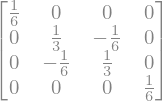

In [90]:
rho_hv=rho_hv_integral.doit()
rho_hv

Great!  Notice that this isn't a fully incoherent mixture (which would be proportional to the identity matrix), but that there are some off-diagonal terms.  This is what correlations look like in the state density operators.  This specific case has _classical_ correlations, but not quantum entanglement.

Now we need the expectation value of the correlators w.r.t. this state density operator.
The general formula for the expectation value of a measurement $\hat{A}$ w.r.t. a state density operator is
$$
\langle \hat{A} \rangle_{\hat{\rho}} = \mathrm{Trace}[\hat{\rho}\hat{A}].
$$

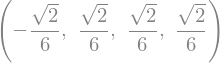

In [95]:
# The expectation values of the correlators are
(rho_hv*ρ_AB).trace(), (rho_hv*ρ_ApB).trace(), (rho_hv*ρ_ABp).trace(), (rho_hv*ρ_ApBp).trace()

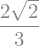

'≈0.942809041582063'

In [101]:
# The LHS of the CSHS inequality is
CSHS_hv=(rho_hv*CSHS).trace()
display(CSHS_hv,f"≈{N(CSHS_hv)}")

Clearly this is ≤2, so the classically anti-correlated hidden local variable states do not violate the CSHS inequality (which they should not).

## Conclusion
We have calculated what the result of the CSHS version of the EPR experiment should be for two hypothesized initials states: the classically anti-correlated hidden local variables state and the entangled Bell singlet state.  As anticipated, the entangled state violates the CSHS inequality but the hidden variables state does not.  But we haven't _proven_ anything.  That requires us to do the experiment.